In [1]:
#step1:Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_29124\784788993.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#step2:Loading data into titanic
titanic=pd.read_csv('archive/Titanic-Dataset.csv')

In [3]:
#step3:Observing first five rows and columns of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#step4:Finding the information and description from the given dataset
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#step5:Finding the number of rows and columns in our dataset
titanic.shape

(891, 12)

In [6]:
#step6:Checking if null values exists in any of the columns
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#step8:Dropping columns that dont affect survival rate
columns_to_drop = [ 'Name', 'Ticket', 'Cabin']
titanic = titanic.drop(columns=columns_to_drop)

In [8]:
#step9:Filling the null cell values in Age column with the mean age values
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='mean')
titanic['Age'] = age_imputer.fit_transform(titanic[['Age']])

In [9]:
#step 10:S is repeated highly,so we replace S in the two missing values of embarked
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_29124\1758203160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)


In [10]:
#step 11:Checking for null values in the dataset
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

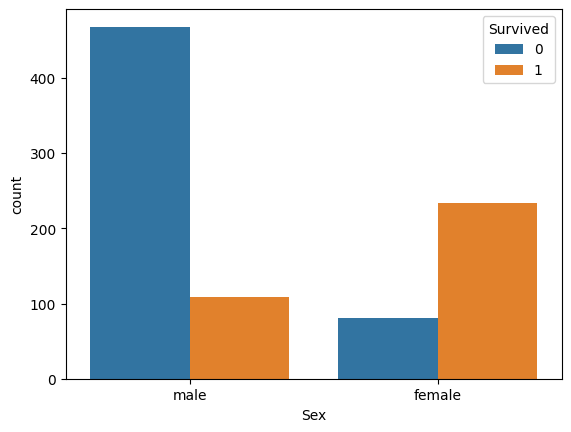

In [11]:
#step 12:Comparing number of survivors based on Sex
sns.countplot(x='Sex',hue='Survived',data=titanic)

Female have high chances of surviving than male

<Axes: xlabel='Pclass', ylabel='count'>

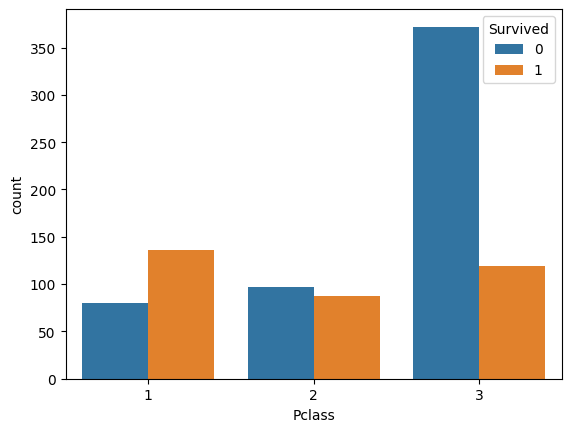

In [12]:
#step 13:Comparing number of survivors based on Pclass
sns.countplot(x='Pclass',hue='Survived',data=titanic)

In [13]:
#step 14:Encoding the values on Sex and Embarked columns
titanic.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
titanic.replace({'Embarked': {'S':0,'C':1,'Q':2}}, inplace=True)

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_29124\1156540346.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_29124\1156540346.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Embarked': {'S':0,'C':1,'Q':2}}, inplace=True)


In [14]:
#step 15:Confirming the encoding on the data
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [15]:
#step 16:Finding correlation
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<Axes: >

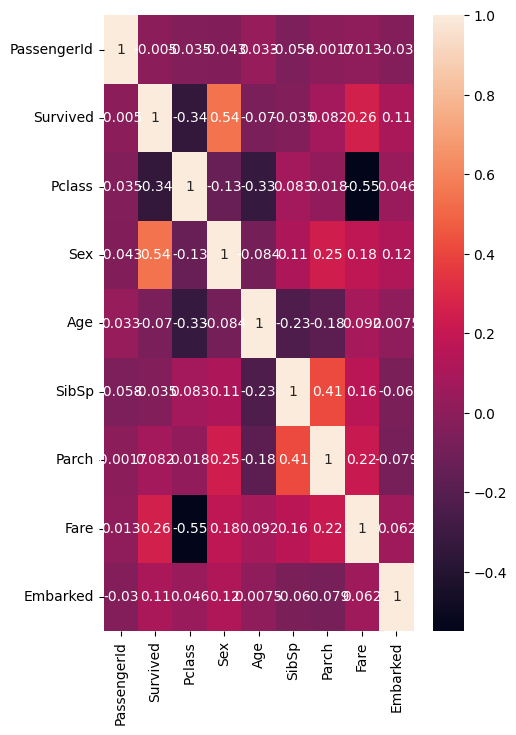

In [16]:
#step17:Correlation in pictorial format
corr=titanic.corr()
fig,ax=plt.subplots(figsize=(5,8))
sns.heatmap(corr, annot=True,ax=ax)

Sex has a relatively high positive correlation with Survived (0.543). This suggests that being female (encoded as 1) is associated with higher chances of survival compared to being male (encoded as 0).

Pclass (passenger class) has a moderate negative correlation with Survived (-0.338). This indicates that passengers in lower classes (higher Pclass values) were less likely to survive compared to those in higher classes.

Age has a weak negative correlation with Survived (-0.070). This suggests a slight tendency for younger passengers to have a slightly higher chance of survival, but the correlation is not very strong.

Fare has a moderate positive correlation with Survived (0.257). This indicates that passengers who paid higher fares were more likely to survive. This correlation could be related to the correlation between Fare and Pclass, as higher class tickets generally cost more.

Embarked has a relatively weak positive correlation with Survived (0.107). This suggests that there might be some influence of the port of embarkation on survival, but the correlation is not very strong.

In [17]:
#step18:Seprating survived columns from x and storing in y
x=titanic.drop(columns=['Survived'],axis=1)
y=titanic['Survived']

In [18]:
print(x,y)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    0  22.000000      1      0   7.2500         0
1              2       1    1  38.000000      1      0  71.2833         1
2              3       3    1  26.000000      0      0   7.9250         0
3              4       1    1  35.000000      1      0  53.1000         0
4              5       3    0  35.000000      0      0   8.0500         0
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    0  27.000000      0      0  13.0000         0
887          888       1    1  19.000000      0      0  30.0000         0
888          889       3    1  29.699118      1      2  23.4500         0
889          890       1    0  26.000000      0      0  30.0000         1
890          891       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 19: Spliting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Step 20: Training the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

C:\Users\PREODATOR HELIOS 300\Desktop\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Step 21: Calculate accuracy on the test set
from sklearn.metrics import accuracy_score

y_pred_test = logistic_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7932960893854749


In [21]:
# Step 22: Getting predictions for training and testing datasets
y_pred_train = logistic_model.predict(x_train)

# Step 23: Creating DataFrames containing PassengerId and Survival predictions
train_predictions = pd.DataFrame({'PassengerId': x_train['PassengerId'], 'Survived': y_pred_train})
test_predictions = pd.DataFrame({'PassengerId': x_test['PassengerId'], 'Survived': y_pred_test})

# Step 25: Concatenating the predictions for training and testing datasets
all_predictions = pd.concat([train_predictions, test_predictions])

# Step 26: Saving predictions to CSV file
all_predictions.to_csv('predictions.csv', index=False)

In [23]:
predictions_df = pd.read_csv('predictions.csv')

#step 27: Getting user input for PassengerId
passenger_id_input = int(input("Enter PassengerId: "))

#step 28: Retrieving survival prediction for the entered PassengerId
survival_prediction = predictions_df.loc[predictions_df['PassengerId'] == passenger_id_input, 'Survived'].values

if len(survival_prediction) == 0:
    print("PassengerId not found in predictions.csv.")
else:
    print("Survival prediction for PassengerId {}: {}".format(passenger_id_input, survival_prediction[0]))


Enter PassengerId:  1


Survival prediction for PassengerId 1: 0
